## 1. Parse code into an AST

In [148]:
import ast

with open('example2.py', 'r') as source:
    tree = ast.parse(source.read())

In [18]:
f_str = "def f(a,b): \n\
\tdef g():\n\
\t\tprint('Hello world') \n\
\treturn a + b \
"
tree = ast.parse(f_str)

## 2. Traverse an AST

### 2.1 Visiting each node in the tree and print its type name

In [149]:
# print all ast fields except None
def print_tree_value(tree, level = 0): 
    if isinstance(tree, ast.AST):
        print('-->'*(level), type(tree).__name__)
    elif tree != None:
        print('-->'*(level), tree, "*")
        return
    else:
        return 
    #else: 
    #    print('-->'*(level), tree, "*")
    #    return
    level += 1
    for child_name, child_obj in ast.iter_fields(tree):
        if isinstance(child_obj, list):
            for item in child_obj:
                print_tree_value(item, level = level)
        else:
            print_tree_value(child_obj, level = level)
    return         

In [150]:
# print only the ast node type
def print_tree(tree, level = 0): 
    if isinstance(tree, ast.AST):
        print('-->'*(level), type(tree).__name__)
    else: 
        print('-->'*(level), tree, "*")
        return
    level = level + 1
    for child_obj in ast.iter_child_nodes(tree):
        print_tree(child_obj, level = level)
    return      

In [ ]:
# def print_tree(tree, level = 0): 
#     level = level + 1
#     for child_name, child_obj in ast.iter_fields(tree):
#         if type(child_obj).__name__ == 'list':
#             print('-->'*(level), type(child_obj[0]).__name__)
#         else:
#             print('-->'*(level), type(child_obj).__name__)
#         #print('-->'*(level), type(child_obj).__name__)
#         print('-->'*(level), child_name)
#         try:
#             print_tree(child_obj, level = level)
#         except:
#             try:
#                 for node in child_obj:
#                     print_tree(node, level = level)
#             except:
#                 print('-->'*(level + 1), child_obj, '*')    
# # print all ast fields
# def print_tree(tree, level = 0): 
#     if isinstance(tree, ast.AST):
#         print('-->'*(level), type(tree).__name__)
#     else: 
#         print('-->'*(level), tree, "*")
#         return
#     level = level + 1
#     for child_name, child_obj in ast.iter_fields(tree):
#         if isinstance(child_obj, list):
#             for item in child_obj:
#                 print_tree(item, level = level)
#         else:
#             print_tree(child_obj, level = level)
#     return      

#### Example 2.1.1 - parse code script and print ast

In [153]:
with open('example2.py', 'r') as source:
    tree = ast.parse(source.read())
print_tree_value(tree)
#print_tree(tree)

 Module
--> FunctionDef
-->--> reverseArray *
-->--> arguments
-->-->--> arg
-->-->-->--> arr *
-->-->--> arg
-->-->-->--> start *
-->-->--> arg
-->-->-->--> end *
-->--> While
-->-->--> Compare
-->-->-->--> Name
-->-->-->-->--> start *
-->-->-->-->--> Load
-->-->-->--> Lt
-->-->-->--> Name
-->-->-->-->--> end *
-->-->-->-->--> Load
-->-->--> Assign
-->-->-->--> Tuple
-->-->-->-->--> Subscript
-->-->-->-->-->--> Name
-->-->-->-->-->-->--> arr *
-->-->-->-->-->-->--> Load
-->-->-->-->-->--> Index
-->-->-->-->-->-->--> Name
-->-->-->-->-->-->-->--> start *
-->-->-->-->-->-->-->--> Load
-->-->-->-->-->--> Store
-->-->-->-->--> Subscript
-->-->-->-->-->--> Name
-->-->-->-->-->-->--> arr *
-->-->-->-->-->-->--> Load
-->-->-->-->-->--> Index
-->-->-->-->-->-->--> Name
-->-->-->-->-->-->-->--> end *
-->-->-->-->-->-->-->--> Load
-->-->-->-->-->--> Store
-->-->-->-->--> Store
-->-->-->--> Tuple
-->-->-->-->--> Subscript
-->-->-->-->-->--> Name
-->-->-->-->-->-->--> arr *
-->-->-->-->-->-->--> 

#### Example 2.1.2 - parse code string and print ast

In [504]:
f_str = "def f(a,b): \n\
\tdef g():\n\
\t\tprint('Hello world') \n\
\treturn a + b \
"
# f_str = "a = 1 + 2"
tree = ast.parse(f_str)
print_tree_value(tree)

 Module
--> FunctionDef
-->--> f *
-->--> arguments
-->-->--> arg
-->-->-->--> a *
-->-->--> arg
-->-->-->--> b *
-->--> FunctionDef
-->-->--> g *
-->-->--> arguments
-->-->--> Expr
-->-->-->--> Call
-->-->-->-->--> Name
-->-->-->-->-->--> print *
-->-->-->-->-->--> Load
-->-->-->-->--> Str
-->-->-->-->-->--> Hello world *
-->--> Return
-->-->--> BinOp
-->-->-->--> Name
-->-->-->-->--> a *
-->-->-->-->--> Load
-->-->-->--> Add
-->-->-->--> Name
-->-->-->-->--> b *
-->-->-->-->--> Load


In [230]:
print_tree(tree)

 Module
--> FunctionDef
-->--> arguments
-->-->--> arg
-->-->--> arg
-->--> FunctionDef
-->-->--> arguments
-->-->--> Expr
-->-->-->--> Call
-->-->-->-->--> Name
-->-->-->-->-->--> Load
-->-->-->-->--> Str
-->--> Return
-->-->--> BinOp
-->-->-->--> Name
-->-->-->-->--> Load
-->-->-->--> Add
-->-->-->--> Name
-->-->-->-->--> Load


### 2.2 Breadth-first Search 

In [59]:
def bfs(root):
    '''tree -> don't need to store visited booleans
    '''
    nodes_seen = [root]
    
    current_visit_index = 0
    N_nodes = 1
    
    while current_visit_index != N_nodes:
        current_node = nodes_seen[current_visit_index]
        current_visit_index += 1
        
        print(type(current_node).__name__)
        
        for child in ast.iter_child_nodes(current_node):
            nodes_seen.append(child)
            N_nodes += 1

In [60]:
bfs(tree)

Module
FunctionDef
arguments
If
arg
Compare
Expr
Name
Eq
Num
Call
Load
Name
Str
Load


### 2.3 Depth-first Search

In [61]:
def is_leaf_node(node):
    child_nodes = [child for child in ast.iter_child_nodes(node)]
    if not child_nodes:
        return True
    else:
        return False
# is_leaf_node(nodes_seen[11])

def _dfs(current_node, nodes_seen, leaf_nodes_index_set, current_node_index=[-1], level = 1):
    if current_node == None: return
    nodes_seen.append(current_node)
    current_node_index[0] += 1
    
    if is_leaf_node(current_node):
        leaf_nodes_index_set.append(current_node_index[0])
        
    # print(current_node_index[0])
    print('-->'*(level), type(current_node).__name__, current_node_index[0])
    level += 1
    
    for child in ast.iter_child_nodes(current_node):
        _dfs(child, nodes_seen, leaf_nodes_index_set, current_node_index, level)
        
def dfs(root):
    nodes_seen = []
    leaf_nodes_index_set = []
    current_node_index = [-1]
    _dfs(root, nodes_seen, leaf_nodes_index_set, current_node_index)
    return nodes_seen, leaf_nodes_index_set

In [ ]:
# def dfs(current_node, nodes_seen = [], current_node_index = -1):
#     nodes_seen.append(current_node)
#     current_node_index += 1
#     if isinstance(current_node, ast.AST):
#         print(type(current_node).__name__)
#     else:
#         print(current_node, "*")
#     for child in ast.iter_child_nodes(current_node):
#         dfs(child, nodes_seen)
#     return nodes_seen 

# def dfs(tree, nodes_seen, leaf_nodes_index_set, current_node_index=[-1], level = 0): 
#     nodes_seen.append(current_node)
#     current_node_index[0] += 1
    
#     if is_leaf_node(current_node):
#         leaf_nodes_index_set.append(current_node_index[0])
        
#     print(current_node_index[0])
#     print('-->'*(level), type(tree).__name__)
#     level += 1
    
#     for child_obj in ast.iter_child_nodes(tree):
#         dfs(child, nodes_seen, leaf_nodes_index_set, current_node_index, level)
#     return   

In [62]:
nodes_seen, leaf_nodes_index_set = dfs(tree)

--> Module 0
-->--> FunctionDef 1
-->-->--> arguments 2
-->-->-->--> arg 3
-->-->--> If 4
-->-->-->--> Compare 5
-->-->-->-->--> Name 6
-->-->-->-->-->--> Load 7
-->-->-->-->--> Eq 8
-->-->-->-->--> Num 9
-->-->-->--> Expr 10
-->-->-->-->--> Call 11
-->-->-->-->-->--> Name 12
-->-->-->-->-->-->--> Load 13
-->-->-->-->-->--> Str 14


In [63]:
nodes_seen

In [64]:
leaf_nodes_index_set

[3, 7, 8, 9, 13, 14]

### 2.4 Build-in traversal tools 

In [533]:
print(ast.dump(tree))

Module(body=[FunctionDef(name='f', args=arguments(args=[arg(arg='a', annotation=None), arg(arg='b', annotation=None)], vararg=None, kwonlyargs=[], kw_defaults=[], kwarg=None, defaults=[]), body=[FunctionDef(name='g', args=arguments(args=[], vararg=None, kwonlyargs=[], kw_defaults=[], kwarg=None, defaults=[]), body=[Expr(value=Call(func=Name(id='print', ctx=Load()), args=[Str(s='Hello world')], keywords=[]))], decorator_list=[], returns=None), Return(value=BinOp(left=Name(id='a', ctx=Load()), op=Add(), right=Name(id='b', ctx=Load())))], decorator_list=[], returns=None)])


In [241]:
class C(ast.NodeVisitor):
    def generic_visit(self, node):
        print (type(node).__name__)
        print (type(node)._fields)
        ast.NodeVisitor.generic_visit(self, node)
        # self.generic_visit(node)

visitor = C()
visitor.visit(tree)

Module
('body',)
FunctionDef
('name', 'args', 'body', 'decorator_list', 'returns')
arguments
('args', 'vararg', 'kwonlyargs', 'kw_defaults', 'kwarg', 'defaults')
arg
('arg', 'annotation')
arg
('arg', 'annotation')
FunctionDef
('name', 'args', 'body', 'decorator_list', 'returns')
arguments
('args', 'vararg', 'kwonlyargs', 'kw_defaults', 'kwarg', 'defaults')
Expr
('value',)
Call
('func', 'args', 'keywords')
Name
('id', 'ctx')
Load
()
Str
('s',)
Return
('value',)
BinOp
('left', 'op', 'right')
Name
('id', 'ctx')
Load
()
Add
()
Name
('id', 'ctx')
Load
()


In [243]:
for node in ast.walk(tree):
    if isinstance(node, ast.FunctionDef):
        print(node.name)

f
g


In [245]:
((tree.body)[0].args).args[0].arg
type(tree).__name__
isinstance(tree, ast.AST)

True

## 4. Extract path-contexts from an AST

In [89]:
# However, we'd like to ignore nodes of type: Load, Store, Del
IGNORE_TYPES = ['Load', 'Store', 'Del']

def is_leaf_node(node):
    child_nodes = [child for child in ast.iter_child_nodes(node) if type(child).__name__ not in IGNORE_TYPES]
    if not child_nodes:
        return True
    else:
        return False
# is_leaf_node(nodes_seen[11])

def _dfs(current_node, nodes_seen, leaf_nodes_index_set, current_node_index=[-1], level = 1):
    if current_node == None: return
    if type(current_node).__name__ not in IGNORE_TYPES: 
        nodes_seen.append(current_node)
        current_node_index[0] += 1

        if is_leaf_node(current_node):
            leaf_nodes_index_set.append(current_node_index[0])

        # print(current_node_index[0])
        print('-->'*(level), type(current_node).__name__, current_node_index[0])
        level += 1

        for child in ast.iter_child_nodes(current_node):
            _dfs(child, nodes_seen, leaf_nodes_index_set, current_node_index, level)
        
def dfs(root):
    nodes_seen = []
    leaf_nodes_index_set = []
    current_node_index = [-1]
    _dfs(root, nodes_seen, leaf_nodes_index_set, current_node_index)
    return nodes_seen, leaf_nodes_index_set


In [92]:
nodes_seen, leaf_nodes_index_set = dfs(tree)

--> Module 0
-->--> FunctionDef 1
-->-->--> arguments 2
-->-->-->--> arg 3
-->-->--> If 4
-->-->-->--> Compare 5
-->-->-->-->--> Name 6
-->-->-->-->--> Eq 7
-->-->-->-->--> Num 8
-->-->-->--> Expr 9
-->-->-->-->--> Call 10
-->-->-->-->-->--> Name 11
-->-->-->-->-->--> Str 12


In [93]:
type(nodes_seen[10]).__name__ in IGNORE_TYPES

False

In [126]:
nodes_seen

In [127]:
leaf_nodes_index_set

[3, 6, 7, 8, 11, 12]

In [70]:
# get value stored in the leaf node
def get_value(node):
    for name, value in ast.iter_fields(node):
        if value is not None:
            return(value)

In [131]:
node1 = nodes_seen[6]
node2 = nodes_seen[8]
print(get_value(node1))
print(get_value(node2))

a
3


In [73]:
# find lowest common ancestor of two given nodes in the tree
def find_lca(root, node1, node2):
    if root == None: return None
    if root == node1 or root == node2: return root
    
    # look for lca in all subtrees 
    lca_list = []
    for child_node in ast.iter_child_nodes(root):
        if child_node not in IGNORE_TYPES:
            lca_list.append(find_lca(child_node, node1, node2))
            
    # Remove None in the list 
    lca_list = [i for i in lca_list if i != None]
    # print('for node:', type(root).__name__)
    # print(lca_list)
    
    # If two of the above calls returns non-None, then two nodes are present in separate subtree
    #if len(lca_list) == 2:
    if len(lca_list) >= 2:
        return root
    # If above calls return one non-None, then two nodes exit in one subtree
    if len(lca_list) == 1:
        return lca_list[0]
    return None

In [134]:
aa = find_lca(tree, node1, node2)
aa

In [129]:
# extract path between two leaf nodes, given the lowest common parents
def extract_path(root, node1, node2):
    if root == None: return None 
    if root == node1 or root == node2: return type(root).__name__
    
    # look for lca in all subtrees 
    lca_list = []
    for child_node in ast.iter_child_nodes(root):
        if child_node not in IGNORE_TYPES:
            lca_list.append(extract_path(child_node, node1, node2))
            
    # Remove None in the list 
    lca_list = [i for i in lca_list if i != None]
    # print('for node:', type(root).__name__)
    # print(lca_list)
    
    # If two of the above calls returns non-None, then two nodes are present in separate subtree
    # if len(lca_list) == 2:
    if len(lca_list) >= 2:
        first_str = '_'.join(lca_list[0].replace('DOWN', 'UP').split('_')[::-1])
        return first_str + '_UP_' + type(root).__name__ + '_DOWN_' + lca_list[1]
    # If above calls return one non-None, then two nodes exit in one subtree
    if len(lca_list) == 1:
            return type(root).__name__ + '_DOWN_' + lca_list[0]
    return None

In [135]:
path = extract_path(aa, node1, node2)
path

'Name_UP_Compare_DOWN_Num'

In [142]:
max_path_width = 30
max_path_length = 80
# get path context for each pair of terminal nodes
N_nodes = len(nodes_seen)
N_leaf = len(leaf_nodes_index_set)
bag_of_path_context = []
for i in range(N_leaf):
    for j in range(i+1, N_leaf):
        if abs(i - j) > max_path_width:
            continue
        node1 = nodes_seen[leaf_nodes_index_set[i]]
        node2 = nodes_seen[leaf_nodes_index_set[j]]
        lcp = find_lca(tree, node1, node2)
        path = extract_path(lcp, node1, node2)
        path_length = len(re.split('_UP_|_DOWN_', path)) - 1
        if path_length > max_path_length:
            continue
        value1 = get_value(node1)
        value2 = get_value(node2)
        if path.split('_')[0] == type(node1).__name__:
            path_context = ','.join([str(value1), path, str(value2)])
        else:
            path_context = ','.join([str(value2), path, str(value1)])
        bag_of_path_context.append(path_context)

In [143]:
bag_of_path_context

['a,arg_UP_arguments_UP_FunctionDef_DOWN_If_DOWN_Compare_DOWN_Name,a',
 'a,arg_UP_arguments_UP_FunctionDef_DOWN_If_DOWN_Compare_DOWN_Eq,None',
 'a,arg_UP_arguments_UP_FunctionDef_DOWN_If_DOWN_Compare_DOWN_Num,3',
 'a,arg_UP_arguments_UP_FunctionDef_DOWN_If_DOWN_Expr_DOWN_Call_DOWN_Name,print',
 'a,arg_UP_arguments_UP_FunctionDef_DOWN_If_DOWN_Expr_DOWN_Call_DOWN_Str,hello',
 'a,Name_UP_Compare_DOWN_Eq,None',
 'a,Name_UP_Compare_DOWN_Num,3',
 'a,Name_UP_Compare_UP_If_DOWN_Expr_DOWN_Call_DOWN_Name,print',
 'a,Name_UP_Compare_UP_If_DOWN_Expr_DOWN_Call_DOWN_Str,hello',
 'None,Eq_UP_Compare_DOWN_Num,3',
 'None,Eq_UP_Compare_UP_If_DOWN_Expr_DOWN_Call_DOWN_Name,print',
 'None,Eq_UP_Compare_UP_If_DOWN_Expr_DOWN_Call_DOWN_Str,hello',
 '3,Num_UP_Compare_UP_If_DOWN_Expr_DOWN_Call_DOWN_Name,print',
 '3,Num_UP_Compare_UP_If_DOWN_Expr_DOWN_Call_DOWN_Str,hello',
 'print,Name_UP_Call_DOWN_Str,hello']

In [80]:
# extract path contexts for single method ast
def extract_path_contexts_single(tree_single):
    nodes_seen, leaf_nodes_index_set = dfs(tree_single)
    
    N_nodes = len(nodes_seen)
    N_leaf = len(leaf_nodes_index_set)
    bag_of_path_context = []
    method_name = tree_single.name
    bag_of_path_context.append(method_name)
    
    for i in range(N_leaf):
        for j in range(i+1, N_leaf):
            if abs(i - j) > max_path_width:
                continue
            node1 = nodes_seen[leaf_nodes_index_set[i]]
            node2 = nodes_seen[leaf_nodes_index_set[j]]
            lcp = find_lca(tree_single, node1, node2)
            path = extract_path(lcp, node1, node2)
            path_length = len(re.split('_UP_|_DOWN_', path)) - 1
            if path_length > max_path_length:
                continue
            value1 = get_value(node1)
            value2 = get_value(node2)
            if path.split('_')[0] == type(node1).__name__:
                path_context = ','.join([str(value1), path, str(value2)])
            else:
                path_context = ','.join([str(value2), path, str(value1)])
            bag_of_path_context.append(path_context)
    return bag_of_path_context  

In [81]:
for i in range(5):
    if i < 3:
        continue
    print('aa', i)

aa 3
aa 4


In [144]:
def string_hashcode(s):
    h = 0 
    for c in s:
        h = (31 * h + ord(c)) & 0xFFFFFFFF
    return ((h + 0x80000000) & 0xFFFFFFFF) - 0x80000000

In [306]:
path

'arguments_UP_FunctionDef_UP_FunctionDef_DOWN_Return_DOWN_BinOp_DOWN_Name'

In [147]:
string_hashcode('Eq_UP_Compare_UP_If_DOWN_Print_DOWN_Str')

-1413835846

In [82]:
# split an AST into a list of subtree nodes of type FunctionDef,
# for FunctionDef inside ClassDef, modify the method name by adding class name
def split_tree(tree):
    subtree_list = []
    for node in tree.body:
        if isinstance(node, ast.FunctionDef):
            subtree_list.append(node)
        if isinstance(node, ast.ClassDef):
            className = node.name
            for item in node.body:
                if isinstance(item, ast.FunctionDef):
                    item.name = className + '_' + item.name
                    subtree_list.append(item)
    return subtree_list


# extract path contexts from an AST generated from a script
def extract_path_contexts_file(tree):
    methods = []
    subtree_list = split_tree(tree)
    for root in subtree_list:
        temp = extract_path_contexts_single(root)
        methods.append(temp)
    return methods


In [83]:
extract_path_contexts_single(subtree_list[3])

NameError: name 'subtree_list' is not defined

In [85]:
with open('example.py', 'r') as source:
    tree = ast.parse(source.read())
methods = extract_path_contexts_file(tree)

for method in methods:
    print(method[0:5], '\n\n\n')

--> FunctionDef 0
-->--> arguments 1
-->-->--> arg 2
-->-->--> arg 3
-->--> Assign 4
-->-->--> Name 5
-->-->--> BinOp 6
-->-->-->--> Name 7
-->-->-->--> Add 8
-->-->-->--> Name 9
-->--> Return 10
-->-->--> Name 11


NameError: name 're' is not defined

## Remove docstring

In [297]:
x = 'Hello world \n\
"""comment \n"""\n\
z += 1\n\
"""docstring"""\n\
x = x + y + x'
print(x)

Hello world 
"""comment 
"""
z += 1
"""docstring"""
x = x + y + x


In [512]:
x = 'Hello world \n\
z += 1\n\
x = x + y + x'
print(x)

Hello world 
z += 1
x = x + y + x


In [513]:
# strip_docstring
import re

def strip_docstring(code_string):
    a = []
    for y in re.finditer('"""', code_string):
        a.append(y)
    if len(a) == 0:
        return code_string
    output = ''
    output = output + code_string[0:a[0].start()]
    for i in range(int(len(a) / 2 - 1)):
        output = output + code_string[a[2 * i + 1].end():a[2 * i + 2].start()]
    output = output + code_string[a[len(a)-1].end():]
    return output

In [514]:
print(strip_docstring(x))

Hello world 
z += 1
x = x + y + x


In [300]:
with open('example.py', 'r') as source:
    code_string = strip_docstring(source.read())
    print(code_string)
    #tree = ast.parse(code_string)

def method_1(arg1, arg2):
    add = arg1 + arg2
    return add

def method_2(n, arg2):
    for i in range(n):
        if i > arg2: 
            print('yes!')
    
def method_3(x):
    # comments
    print('hello!')


class class_name_1(object):
    
    def __init__(self, x, y):
        
        self.x = x
        self.y = y
    def methodlalala():
        print(2)
    
if __name__ == '__main__':
    obj = class_name_1(2, 4)
    print(obj.x)


In [213]:
# import inspect
# with open('example.py', 'r') as source:
#     aa = inspect.cleandoc(source.read())
#     print(aa)

# Debug

In [379]:
file_path = '../source_code_repo/test_folder/matlib.py'
with open(file_path, 'r') as source:
    code_string = strip_docstring(source.read())
    tree = ast.parse(code_string)
    subtrees = split_tree(tree)

In [443]:
tree_single = subtrees[7]

In [445]:
nodes_seen, leaf_nodes_index_set = dfs(tree_single)

--> FunctionDef 0
-->--> arguments 1
-->-->--> arg 2
-->-->--> arg 3
-->-->--> arg 4
-->--> Assign 5
-->-->--> Name 6
-->-->--> Call 7
-->-->-->--> Name 8
-->-->-->--> Name 9
-->--> Assign 10
-->-->--> Name 11
-->-->--> Attribute 12
-->-->-->--> Name 13
-->--> If 14
-->-->--> Compare 15
-->-->-->--> Name 16
-->-->-->--> Eq 17
-->-->-->--> Num 18
-->-->--> Assign 19
-->-->-->--> Tuple 20
-->-->-->-->--> Name 21
-->-->-->-->--> Name 22
-->-->-->--> Tuple 23
-->-->-->-->--> Num 24
-->-->-->-->--> Num 25
-->-->--> If 26
-->-->-->--> Compare 27
-->-->-->-->--> Name 28
-->-->-->-->--> Eq 29
-->-->-->-->--> Num 30
-->-->-->--> Assign 31
-->-->-->-->--> Tuple 32
-->-->-->-->-->--> Name 33
-->-->-->-->-->--> Name 34
-->-->-->-->--> Tuple 35
-->-->-->-->-->--> Num 36
-->-->-->-->-->--> Subscript 37
-->-->-->-->-->-->--> Attribute 38
-->-->-->-->-->-->-->--> Name 39
-->-->-->-->-->-->--> Index 40
-->-->-->-->-->-->-->--> Num 41
-->-->-->--> Assign 42
-->-->-->-->--> Tuple 43
-->-->-->-->-->--> Na

In [446]:
node1 = nodes_seen[leaf_nodes_index_set[0]]
node2 = nodes_seen[leaf_nodes_index_set[1]]
node1

In [449]:
[leaf_nodes_index_set[0]]
[leaf_nodes_index_set[1]]

[3]

In [458]:
lca = find_lca(tree_single, node1, node2)
print(lca)

In [433]:
print(extract_path(tree_single, node1, node2))

arg_UP_arguments_UP_FunctionDef_DOWN_Assign_DOWN_BinOp_DOWN_Mult


### find all .py files in a folder, including subfolders

In [301]:
# find all python files in a folder
import os

In [302]:
dir_path = '/home/xiaojzhu'
for dirpath, dirnames, filenames in os.walk(dir_path):
    for filename in [f for f in filenames if f.endswith(".py")]:
        print (os.path.join(dirpath, filename))

/home/xiaojzhu/Github/workshop-coding-best-practices/model.py
/home/xiaojzhu/Github/workshop-coding-best-practices/setup.py
/home/xiaojzhu/Github/workshop-coding-best-practices/tests/test_generic.py
/home/xiaojzhu/Github/workshop-coding-best-practices/tests/test_module.py
/home/xiaojzhu/Github/workshop-coding-best-practices/myproject/module.py
/home/xiaojzhu/Github/openshift-intern-workshop/app.py
/home/xiaojzhu/Github/openshift-intern-workshop/workshop/__init__.py
/home/xiaojzhu/Github/openshift-intern-workshop/workshop/openshift_info.py
/home/xiaojzhu/Github/code2vec/interactive_predict.py
/home/xiaojzhu/Github/code2vec/model.py
/home/xiaojzhu/Github/code2vec/code2vec.py
/home/xiaojzhu/Github/code2vec/__init__.py
/home/xiaojzhu/Github/code2vec/PathContextReader.py
/home/xiaojzhu/Github/code2vec/common.py
/home/xiaojzhu/Github/code2vec/preprocess.py
/home/xiaojzhu/Github/code2vec/extractor.py
/home/xiaojzhu/Github/code2vec/CSharpExtractor/extract.py
/home/xiaojzhu/Github/code2vec/Java

/home/xiaojzhu/.local/share/virtualenvs/workshop-coding-best-practices-HBo38CHR/lib/python3.6/site-packages/hypothesis/vendor/__init__.py
/home/xiaojzhu/.local/share/virtualenvs/workshop-coding-best-practices-HBo38CHR/lib/python3.6/site-packages/hypothesis/vendor/pretty.py
/home/xiaojzhu/.local/share/virtualenvs/workshop-coding-best-practices-HBo38CHR/lib/python3.6/site-packages/hypothesis/internal/compat.py
/home/xiaojzhu/.local/share/virtualenvs/workshop-coding-best-practices-HBo38CHR/lib/python3.6/site-packages/hypothesis/internal/intervalsets.py
/home/xiaojzhu/.local/share/virtualenvs/workshop-coding-best-practices-HBo38CHR/lib/python3.6/site-packages/hypothesis/internal/validation.py
/home/xiaojzhu/.local/share/virtualenvs/workshop-coding-best-practices-HBo38CHR/lib/python3.6/site-packages/hypothesis/internal/reflection.py
/home/xiaojzhu/.local/share/virtualenvs/workshop-coding-best-practices-HBo38CHR/lib/python3.6/site-packages/hypothesis/internal/charmap.py
/home/xiaojzhu/.local

/home/xiaojzhu/.local/share/virtualenvs/workshop-coding-best-practices-HBo38CHR/lib/python3.6/site-packages/pluggy/__init__.py
/home/xiaojzhu/.local/share/virtualenvs/workshop-coding-best-practices-HBo38CHR/lib/python3.6/site-packages/pluggy/callers.py
/home/xiaojzhu/.local/share/virtualenvs/workshop-coding-best-practices-HBo38CHR/lib/python3.6/site-packages/pluggy/hooks.py
/home/xiaojzhu/.local/share/virtualenvs/workshop-coding-best-practices-HBo38CHR/lib/python3.6/site-packages/pluggy/_version.py
/home/xiaojzhu/.local/share/virtualenvs/workshop-coding-best-practices-HBo38CHR/lib/python3.6/site-packages/pluggy/manager.py
/home/xiaojzhu/.local/share/virtualenvs/workshop-coding-best-practices-HBo38CHR/lib/python3.6/site-packages/pluggy/_tracing.py
/home/xiaojzhu/.local/share/virtualenvs/workshop-coding-best-practices-HBo38CHR/lib/python3.6/site-packages/importlib_metadata/_compat.py
/home/xiaojzhu/.local/share/virtualenvs/workshop-coding-best-practices-HBo38CHR/lib/python3.6/site-packag

/home/xiaojzhu/AST-parsing/source_code_repo/pandas-master/pandas/tests/indexing/multiindex/test_ix.py
/home/xiaojzhu/AST-parsing/source_code_repo/pandas-master/pandas/tests/indexing/multiindex/test_xs.py
/home/xiaojzhu/AST-parsing/source_code_repo/pandas-master/pandas/tests/indexing/multiindex/__init__.py
/home/xiaojzhu/AST-parsing/source_code_repo/pandas-master/pandas/tests/indexing/multiindex/test_getitem.py
/home/xiaojzhu/AST-parsing/source_code_repo/pandas-master/pandas/tests/indexing/multiindex/test_iloc.py
/home/xiaojzhu/AST-parsing/source_code_repo/pandas-master/pandas/tests/indexing/multiindex/test_setitem.py
/home/xiaojzhu/AST-parsing/source_code_repo/pandas-master/pandas/tests/indexing/multiindex/conftest.py
/home/xiaojzhu/AST-parsing/source_code_repo/pandas-master/pandas/tests/indexing/multiindex/test_slice.py
/home/xiaojzhu/AST-parsing/source_code_repo/pandas-master/pandas/tests/indexing/multiindex/test_chaining_and_caching.py
/home/xiaojzhu/AST-parsing/source_code_repo/pan

In [10]:
f_string = ['a = 5', 'a+b = 5']


In [12]:
trees = []
for f in f_string:
    try:
        trees.append(ast.parse(f))
    except:
        pass
    print('ssss')

ssss
ssss


In [14]:
ast.parse(f_string[1])

SyntaxError: can't assign to operator (<unknown>, line 1)

In [15]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Example of good embeddings')

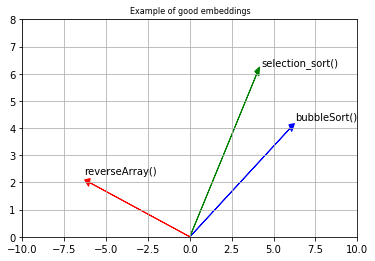

In [42]:
ax = plt.axes()

ax.arrow(0.0, 0.0, 6.0, 4.0, head_width=0.3, head_length=0.3, fc='blue', ec='blue')
ax.annotate('bubbleSort()', xy = (6,4), xytext=(6.3,4.3))
ax.arrow(0.0, 0.0, 4.0, 6.0, head_width=0.3, head_length=0.3, fc='green', ec='green')
ax.annotate('selection_sort()', xy = (4,6), xytext=(4.3,6.3))
ax.arrow(0.0, 0.0, -6.0, 2.0, head_width=0.3, head_length=0.3, fc='red', ec='red')
ax.annotate('reverseArray()', xy = (-6,2), xytext=(-6.3,2.3))

plt.grid()

plt.xlim(-10,10)
plt.ylim(0,8)

plt.title('Example of good embeddings', size=8)

Text(0.5, 1.0, 'Example of bad embeddings')

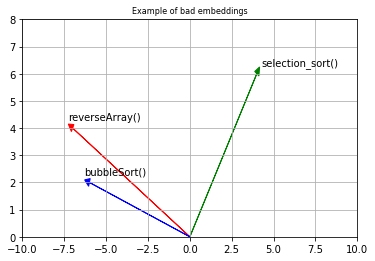

In [50]:
ax = plt.axes()

ax.arrow(0.0, 0.0, -7.0, 4.0, head_width=0.3, head_length=0.3, fc='red', ec='red')
ax.annotate('reverseArray()', xy = (-7,4), xytext=(-7.3,4.3))
ax.arrow(0.0, 0.0, 4.0, 6.0, head_width=0.3, head_length=0.3, fc='green', ec='green')
ax.annotate('selection_sort()', xy = (4,6), xytext=(4.3,6.3))
ax.arrow(0.0, 0.0, -6.0, 2.0, head_width=0.3, head_length=0.3, fc='blue', ec='blue')
ax.annotate('bubbleSort()', xy = (-6,2), xytext=(-6.3,2.3))

plt.grid()

plt.xlim(-10,10)
plt.ylim(0,8)

plt.title('Example of bad embeddings', size=8)